The purpose of this file is to perform experiments and keep notes. I prefer to do it this way to keep the other files cleaner and minimize necessary cleanup work later.

In [107]:
import pandas as pd
from pymongo import MongoClient

client = MongoClient()
db = client.osm
bergen = db.bergen

# df = pd.DataFrame(list(db.bergen.find()))

In [56]:
feature_list = list(db.bergen.find())

In [58]:
feature_list[1000:1001]

[{'_id': ObjectId('58b233fa4c23d493ae20fdcb'),
  'created': {'changeset': '36569088',
   'timestamp': '2016-01-14T12:22:52Z',
   'uid': '2114448',
   'user': 'FredrikLindseth_import',
   'version': '3'},
  'id': '674467',
  'pos': [60.3928672, 5.3204936],
  'type': 'node'}]

In [59]:
df['created'][1:10]

1    {'timestamp': '2010-10-10T22:29:55Z', 'version...
2    {'timestamp': '2010-10-10T22:29:54Z', 'version...
3    {'timestamp': '2010-10-10T22:30:31Z', 'version...
4    {'timestamp': '2010-10-10T22:30:34Z', 'version...
5    {'timestamp': '2010-10-10T22:29:56Z', 'version...
6    {'timestamp': '2010-10-10T22:30:51Z', 'version...
7    {'timestamp': '2005-12-27T13:49:02Z', 'version...
8    {'timestamp': '2010-10-10T22:30:29Z', 'version...
9    {'timestamp': '2010-10-10T22:30:31Z', 'version...
Name: created, dtype: object

In [60]:
df['address'][1:10]

1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
Name: address, dtype: object

In [210]:
from IPython.display import display
from IPython.display import HTML

#Getting count of documents with address field

address_query = { 'address' : {'$exists' : True } }
address_documents = db.bergen.find(address_query)
address_count = address_documents.count()

address_count

84625

In [62]:
address_documents = db.bergen.find(address_query)#, { 
#         'address.street': 1,'address.housenumber': 1,'address.postcode': 1,'address.city': 1
#     }
#                                   )

In [63]:
tmp_list = list(address_documents)

In [64]:
len(tmp_list)

84625

In [65]:
tmp_list[1]

{'_id': ObjectId('58b234204c23d493ae2ac3c6'),
 'address': {'city': 'Bergen', 'country': 'NO'},
 'created': {'changeset': '13152040',
  'timestamp': '2012-09-18T06:52:36Z',
  'uid': '122014',
  'user': 'Bård Aase',
  'version': '1'},
 'id': '181560377',
 'node_refs': ['1919721285',
  '1919721278',
  '1919721283',
  '1919721287',
  '1919721285'],
 'type': 'way'}

In [66]:
from pprint import pprint

In [67]:


to_df = list()
# columns = ['street','housenumber','postcode','city']
count = 0 

for doc in tmp_list:
    record = { 'id': doc['id'], 'type': doc['type'] }
    
    for key,val in doc['address'].items():
        record[key] = val
        
    for key,val in doc['created'].items():
        record['created_' + key] = val
    
    if 'pos' in doc.keys():
        record['lat'] = doc['pos'][0]
        record['lon'] = doc['pos'][1]
    
    to_df.append(record)

In [68]:

tmp_set = set()

for doc in tmp_list:
    
    for k,v in doc.items():
        
        if k in ('address','created'):
            for key,val in v.items():
                tmp_set.add(k+'_'+key)
        else:
            tmp_set.add(k)
    

In [69]:
tmp_set

{'_id',
 'address_city',
 'address_country',
 'address_floor',
 'address_full',
 'address_housename',
 'address_housenumber',
 'address_postcode',
 'address_street',
 'building',
 'contact',
 'created_changeset',
 'created_timestamp',
 'created_uid',
 'created_user',
 'created_version',
 'description',
 'diet',
 'drink',
 'fuel',
 'health_facility',
 'health_specialty',
 'id',
 'internet_access',
 'isced',
 'medical_system',
 'name',
 'node_refs',
 'note',
 'operator',
 'payment',
 'pos',
 'recycling',
 'roof',
 'socket',
 'source',
 'toilets',
 'type',
 'website',
 'wheelchair'}

In [70]:
df_address = pd.DataFrame(to_df, columns = [
        'id','street','housenumber','city','postcode','created_uid','created_user',
        'created_version','created_timestamp','created_uid',
    'lat','lon','type'] )

In [71]:
df_address[1:10]

,id,street,housenumber,city,postcode,created_uid,created_user,created_version,created_timestamp,created_uid,lat,lon,type
1,181560377,NaN,NaN,Bergen,NaN,122014,Bård Aase,1,2012-09-18T06:52:36Z,122014,NaN,NaN,way
2,181560381,NaN,NaN,Bergen,NaN,122014,Bård Aase,1,2012-09-18T06:52:37Z,122014,NaN,NaN,way
3,181560383,NaN,NaN,Bergen,NaN,122014,Bård Aase,1,2012-09-18T06:52:37Z,122014,NaN,NaN,way
4,2840313635,NaN,NaN,NaN,NaN,1965308,FredrikLindseth,2,2016-01-14T13:21:58Z,1965308,60.393595,5.324170,node
5,3942161677,NaN,NaN,NaN,NaN,673287,Mariast,2,2016-09-22T22:38:49Z,673287,60.391950,5.323531,node
6,3942161709,NaN,NaN,NaN,NaN,1965308,FredrikLindseth,1,2016-01-12T18:10:50Z,1965308,60.392987,5.326104,node
7,3942161715,NaN,NaN,NaN,NaN,2178612,HelgeO,2,2016-08-09T20:32:09Z,2178612,60.392889,5.326028,node
8,3942161720,NaN,NaN,NaN,NaN,673287,Mariast,2,2016-09-22T22:38:55Z,673287,60.391913,5.323678,node
9,3946010571,NaN,NaN,NaN,NaN,1965308,FredrikLindseth,2,2016-01-31T13:26:20Z,1965308,60.387378,5.328667,node


In [72]:
df_address.count()

id                   84625
street               84441
housenumber          84377
city                 84386
postcode             84390
created_uid          84625
created_user         84625
created_version      84625
created_timestamp    84625
created_uid          84625
lat                  83998
lon                  83998
type                 84625
dtype: int64

In [73]:
values = []
for cc in db.bergen.find():
  values.append(cc['created'])

print(pd.DataFrame(values)[1:10])

  changeset             timestamp     uid      user version
1   6007582  2010-10-10T22:29:55Z  114230  danerikk       3
2   6007582  2010-10-10T22:29:54Z  114230  danerikk       2
3   6007582  2010-10-10T22:30:31Z  114230  danerikk       2
4   6007582  2010-10-10T22:30:34Z  114230  danerikk       2
5   6007582  2010-10-10T22:29:56Z  114230  danerikk       2
6   6007582  2010-10-10T22:30:51Z  114230  danerikk       2
7      1288  2005-12-27T13:49:02Z     157  JackRyan       1
8   6007582  2010-10-10T22:30:29Z  114230  danerikk       3
9   6007582  2010-10-10T22:30:31Z  114230  danerikk       2


In [74]:
import pandas as pd

postcodes_per_municipality = pd.read_csv('data/Postnummerregister_ansi.tsv', encoding='utf-8',delimiter='\t',header=0, names=[
        'postal_code','postal_place','muni_number','muni_name','category'],
            dtype = {'postal_code': str, 'municipality_number': str})

postcodes_per_municipality.head(5)

,postal_code,postal_place,muni_number,muni_name,category
0,0010,OSLO,301,OSLO,B
1,0015,OSLO,301,OSLO,B
2,0018,OSLO,301,OSLO,G
3,0021,OSLO,301,OSLO,P
4,0024,OSLO,301,OSLO,P


In [75]:
postcodes_per_municipality['postcodes_per_municipality'] = pd.to_numeric(postcodes_per_municipality['postal_code'])

In [76]:
import timeit
tmp_sl = postcodes_per_municipality['postal_code']


start = timeit.timeit()
for i in tmp_sl:
    if i == 5151:
        print('series for and if equal')

end = timeit.timeit()
print(end - start)

start = timeit.timeit()

if 5140 in tmp_sl.values:
        print('series if in')
    
end = timeit.timeit()
print(end - start)

tmp_sl = list(tmp_sl)

start = timeit.timeit()
for i in tmp_sl:
    if i == 5151:
        print('list for and if equal')

end = timeit.timeit()
print(end - start)

start = timeit.timeit()

if 5140 in tmp_sl:
        print('list if in')
    
end = timeit.timeit()
print(end - start)

# for func in f:
#     f = ['value = [val[5] for col,val in dictionary.items()]', 'value = s.loc[5]', 'value = df.iloc[5]']

#     print(min(timeit.Timer(func, setup).repeat(3, 100000)))

0.003910201950930059
-0.0030033370130695403
-0.0020145499729551375
0.0027454040246084332


In [77]:
%alias_magic t timeit

import timeit
tmp_sl = postcodes_per_municipality['postal_code']


for i in tmp_sl:
    if i == 5151:
        print('series for and if equal')

%t -n1 if str(5146) in tmp_sl.values: print('series if in')

tmp_sl = list(tmp_sl)

for i in tmp_sl: 
    if i == 5151: 
        print('list for and if equal')

%t -n1 if str(5146) in tmp_sl: print('list if in')

# for func in f:
#     f = ['value = [val[5] for col,val in dictionary.items()]', 'value = s.loc[5]', 'value = df.iloc[5]']

#     print(min(timeit.Timer(func, setup).repeat(3, 100000)))

Created `%t` as an alias for `%timeit`.
Created `%%t` as an alias for `%%timeit`.
series if in
series if in
series if in
1 loop, best of 3: 260 µs per loop
list if in
list if in
list if in
1 loop, best of 3: 183 µs per loop


In [78]:
tmp_sl = postcodes_per_municipality['postal_code']


tmp_sl.values

array(['0010', '0015', '0018', ..., '9982', '9990', '9991'], dtype=object)

In [79]:
#Removed cell February 9, 2017

# aggregated = bergen.aggregate([  
#         {'$match' :  { 'address': {'$exists' : True }, 'type': 'way' } },
#         { "$group" : { 
#                 "_id" : "$id","count" : { "$sum" : 1} } }
#     ])

# unique_street_count = 0

# for doc in aggregated:
# #     household_count += doc['count']
#     unique_street_count += 1

# print(unique_street_count)

#Removed cell, February 9, 2017

#EXPERIMENTAL, WILL BE REMOVED
streetnames_sorted_dict = dict(sorted(addresses_on_street.items(), key=lambda x: x[1], reverse=True))

for rec in streetnames_sorted_dict:
    if streetnames_sorted_dict[rec] == 184:
        print (rec,streetnames_sorted_dict[rec],type(rec))

#Removed cell February 9, 2017

#EXPERIMENTAL, WILL BE REMOVED
tmp_agg = db.bergen.aggregate([
         { "$group" : { "_id" : "$address.street",
                       "mset" : {
                         "$addToSet" : "$address.house_number"
                 } } },
         { "$unwind" : "$mset"},
         { "$group" : { "_id" : "$_id",
                       "count" : { "$sum" : 1} } },
         { "$sort" : { "count" : -1 } },
         { "$limit" : 10 } ] )

for doc in tmp_agg:
    print(doc)

#Removed cell February 20, 2017

#Converting list for dataframe usage
to_df = []

for dic in duplicate_addresses:
    dictionary = dict()
    
#     for key,val in dic.items():
#         dictionary[key] = val
        
#         if key == '_id':
    for key,val in dic['_id'].items():
        dictionary[key] = val
        
    dictionary['count'] = dic['count']
                
        
    to_df.append(dictionary)
    
to_df

#Removed from cleaning part February 20, 2017

            if count < 10:
                pass
            elif count == 10:
                pprint(data)
            else:
                break
        
        addr_count = 0
        for node in data:
            if (addr_count < 20) and 'address' in node.keys():-=0
                addr_count += 1
                pprint(node['address'])  

In [108]:
from collections import defaultdict

user_count_query = bergen.aggregate( [
   {
     '$group': {
        '_id' : { 'uid': '$created.uid', 'username': '$created.user' }
           }
        },
   {
     '$group': {
        '_id': 'null',
        'count': { '$sum': 1 }
     }
   }
] )

for doc in user_count_query:
    user_count = doc['count']

average_contributions = bergen.aggregate( [
   {
          '$group': 
            {
                '_id' : 
                { 'uid': '$created.uid', 'username': '$created.user' },
                'count': { '$sum': 1 } 
            } 
    },
    { 
            '$group': 
            {
                '_id': 'null',
                'avg': { '$avg': '$count' } 
            }
    }
] )

for doc in average_contributions:
    user_average = round(doc['avg'],2)
    
grouped_users = list(bergen.aggregate([  
        { 
            "$group" : 
            { 
                "_id" : { "uid": "$created.uid", "username": "$created.user" },
                "count" : { "$sum" : 1} 
            } 
        },
        { "$sort" : { "count" : 1 } }
        ]))

user_no = 0
halfway = round(user_count / 2)
mode_dict = defaultdict(int)

for doc in grouped_users:
        user_no += 1
        val = doc['count']
        if user_no == halfway:
            user_median = val
        
        mode_dict[val] += 1

user_mode = max(mode_dict.items(), key=lambda a: a[1])
mode_percentage = round((user_mode[1] / user_count) * 100,2)
            
print("Total user count:",user_count)
print("Average contributions per user:",user_average)
print("Median contributions per user:",user_median)
print("Mode of contribution count: {0} contributors ({1}%) submitted {2} edit.".format(
    user_mode[1],mode_percentage,user_mode[0] ) )



Total user count: 399
Average contributions per user: 1707.2
Median contributions per user: 11
Mode of contribution count: 76 contributors (19.05%) submitted 1 edit.


10000


(array([ 371.,    7.,    1.,    2.,    2.,    1.,    1.,    1.,    2.,
           1.,    0.,    1.,    0.,    1.,    0.,    1.,    0.,    0.,
           0.,    0.,    0.,    1.,    1.,    0.,    0.,    1.,    0.,
           0.,    1.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    1.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    1.,    0.,    0.,    0.,    0.,    1.]),
 array([  1.00000000e+00,   1.40893000e+03,   2.81686000e+03,
          4.22479000e+03,   5.63272000e+03,   7.04065000e+03,
          8.44858000e+03,   9.85651000e+03,   1.12644400e+04,
          1.26723700e+04

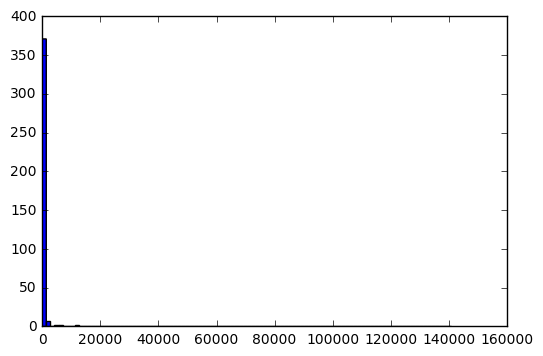

In [93]:
import numpy as np
from matplotlib import pyplot as plt
% matplotlib inline


mu, sigma = 100, 15
x = mu + sigma*np.random.randn(10000)

bah = np.array(list(doc['count'] for doc in grouped_users))

print(len(x))

plt.hist(bah,bins=100)


In [128]:
s_mode_dict = pd.Series(mode_dict)

In [282]:
df_mode_dict = pd.DataFrame(s_mode_dict,columns=['count'])

In [283]:
df_mode_dict['contributions'] = df_mode_dict.index

In [284]:
df_mode_dict = df_mode_dict[['contributions','count']]

In [162]:
[2,3,4,list(range(1,10,2))]

[2, 3, 4, [1, 3, 5, 7, 9]]

In [174]:
list(range(1,10,2)) + list(range(1,4))

[1, 3, 5, 7, 9, 1, 2, 3]

In [245]:
from collections import OrderedDict

bracket_names = OrderedDict()
for item in bins:
    if item != bins[-1]:
        if item < 10:
            bracket_names[str(item)] = item  
        else:
            next = bins[bins.index(item) + 1]
            bracket_names['{0} to {1}'.format(item,next)] = item
            
bracket_names

OrderedDict([('1', 1),
             ('2', 2),
             ('3', 3),
             ('4', 4),
             ('5', 5),
             ('6', 6),
             ('7', 7),
             ('8', 8),
             ('9', 9),
             ('10 to 20', 10),
             ('20 to 30', 20),
             ('30 to 40', 30),
             ('40 to 50', 40),
             ('50 to 60', 50),
             ('60 to 70', 60),
             ('70 to 80', 70),
             ('80 to 90', 80),
             ('90 to 100', 90),
             ('100 to 200', 100),
             ('200 to 300', 200),
             ('300 to 400', 300),
             ('400 to 500', 400),
             ('500 to 600', 500),
             ('600 to 700', 600),
             ('700 to 800', 700),
             ('800 to 900', 800),
             ('900 to 1000', 900),
             ('1000 to 2000', 1000),
             ('2000 to 3000', 2000),
             ('3000 to 4000', 3000),
             ('4000 to 5000', 4000),
             ('5000 to 6000', 5000),
             ('6000 t

In [247]:
bracket_names.keys()

odict_keys(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10 to 20', '20 to 30', '30 to 40', '40 to 50', '50 to 60', '60 to 70', '70 to 80', '80 to 90', '90 to 100', '100 to 200', '200 to 300', '300 to 400', '400 to 500', '500 to 600', '600 to 700', '700 to 800', '800 to 900', '900 to 1000', '1000 to 2000', '2000 to 3000', '3000 to 4000', '4000 to 5000', '5000 to 6000', '6000 to 7000', '7000 to 8000', '8000 to 9000', '9000 to 10000', '10000 to 20000', '20000 to 30000', '30000 to 40000', '40000 to 50000', '50000 to 100000', '100000 to 150000', '150000 to 200000'])

In [254]:
# for key,val in (bracket_names.keys(),bracket_names.values()):
#     print(key,val)

len(bracket_names.values())

43

In [266]:
print(bins)
print(list(bracket_names.values()))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 20000, 30000, 40000, 50000, 100000, 150000, 200000]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 20000, 30000, 40000, 50000, 100000, 150000]


In [317]:
tmp_dict = dict()

for item in bins:
    bin_index = bins.index(item)
        
    try:
        tmp_dict[bracket_names[bin_index]] = item
    except IndexError:
        print(item)
    
tmp_dict

200000


{'1': 1,
 '10': 10,
 '100001 to 150000': 100000,
 '10001 to 20000': 10000,
 '1001 to 2000': 1000,
 '101 to 200': 100,
 '150001 to 200000': 150000,
 '2': 2,
 '20001 to 30000': 20000,
 '2001 to 3000': 2000,
 '201 to 300': 200,
 '21 to 30': 20,
 '3': 3,
 '30001 to 40000': 30000,
 '3001 to 4000': 3000,
 '301 to 400': 300,
 '31 to 40': 30,
 '4': 4,
 '40001 to 50000': 40000,
 '4001 to 5000': 4000,
 '401 to 500': 400,
 '41 to 50': 40,
 '5': 5,
 '50001 to 100000': 50000,
 '5001 to 6000': 5000,
 '501 to 600': 500,
 '51 to 60': 50,
 '6': 6,
 '6001 to 7000': 6000,
 '601 to 700': 600,
 '61 to 70': 60,
 '7': 7,
 '7001 to 8000': 7000,
 '701 to 800': 700,
 '71 to 80': 70,
 '8': 8,
 '8001 to 9000': 8000,
 '801 to 900': 800,
 '81 to 90': 80,
 '9': 9,
 '9001 to 10000': 9000,
 '901 to 1000': 900,
 '91 to 100': 90}

In [336]:
df_mode_dict.dtypes

contributions       int64
count               int64
bracket          category
dtype: object

In [508]:
str(11000)[:-3] + 'K'

'11K'

In [510]:
#Creating age brackets and removing records with missing ageb

bins = list(range(0,10,1) ) + list(range(10,100,10) ) + \
list(range(100,1000,100) ) + list(range(1000,10000,5000) ) + \
list(range(10000,50000,20000) ) + list(range(50000,151000,50000) )

bracket_names = list()
for item in bins:
    if item != bins[-1]:
        if item < 10:
            bracket_names.append(str(item+1)) 
        else:
            start = item + 1
            next = bins[bins.index(item) + 1]
            if start > 1000:
                start = str(start)[:-3] + 'K'
                next = str(next)[:-3] + 'K'
            bracket_names.append('{0} to {1}'.format(start,next))
        
categories = pd.Series(pd.cut(df_mode_dict['contributions'], bins ,
                              labels=bracket_names, include_lowest=True ) )

df_mode_dict['bracket'] = categories
#pd.cut does not work perfectly for what I want, so I have to adjust some brackets
# df_mode_dict['bracket'][df_mode_dict['contributions'] < 11] = df_mode_dict['contributions']

display(df_mode_dict.head(30))
display(df_mode_dict.tail(4))

# print("Number of passengers used for age analysis:", len(age_data))

,contributions,count,bracket
1,1,76,1
2,2,30,2
3,3,23,3
4,4,15,4
5,5,14,5
6,6,9,6
7,7,5,7
8,8,10,8
9,9,11,9
10,10,3,10


,contributions,count,bracket
39789,39789,1,30K to 50K
80243,80243,1,50K to 100K
133655,133655,1,100K to 150K
140794,140794,1,100K to 150K


In [511]:
for_plot = df_mode_dict.groupby('bracket')['count'].agg('sum')

In [512]:
for_plot

bracket
1               76
2               30
3               23
4               15
5               14
6                9
7                5
8               10
9               11
10               3
11 to 20        39
21 to 30        23
31 to 40        14
41 to 50        11
51 to 60        10
61 to 70         9
71 to 80         7
81 to 90         7
91 to 100        1
101 to 200      19
201 to 300       8
301 to 400       8
401 to 500       2
501 to 600       1
601 to 700       3
701 to 800       1
801 to 900       4
901 to 1000      1
1K to 6K        18
6K to 10K        3
10K to 30K       8
30K to 50K       3
50K to 100K      1
100K to 150K     2
Name: count, dtype: int64

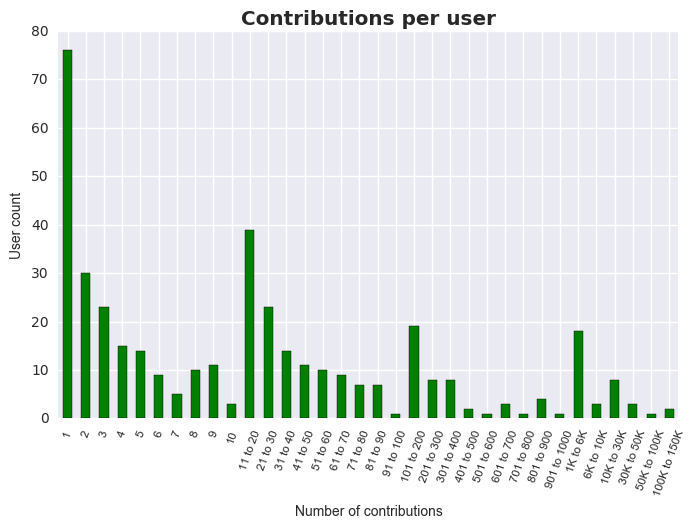

In [513]:
import seaborn as sns

fig = plt.figure(figsize=(8,5))
ax = plt.subplot(1,1,1)

#all passengers plot
rects = for_plot.plot(kind='bar',ax=ax,color='g')
ax.set_title('Contributions per user',fontsize='large',fontweight='bold')
ax.set_xlabel('Number of contributions',fontsize='small')
ax.set_ylabel('User count',fontsize='small')
ax.set_xticklabels(for_plot.index.values,rotation='70',fontsize='x-small')

plt.show()

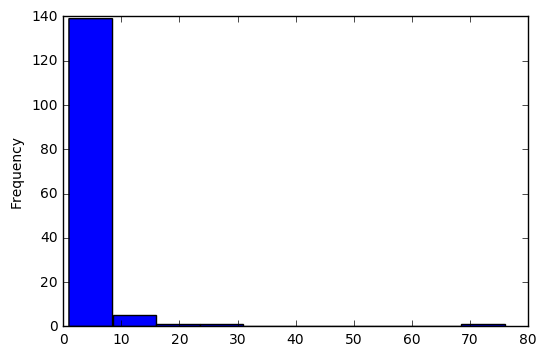

In [127]:
s_mode_dict.plot.hist(bins=10)

In [105]:
bah_list = list(bah)

bah_list.sort()

bah_list[-1]

140794

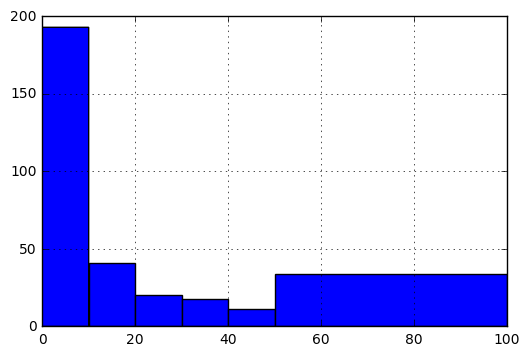

In [433]:
s_grouped_users.hist(bins=[0, 10, 20, 30, 40, 50, 100])

(array([ 196.,   39.,   23., ...,    0.,    0.,    0.]),
 array([     1,     11,     21, ..., 140771, 140781, 140791]),
 <a list of 14079 Patch objects>)

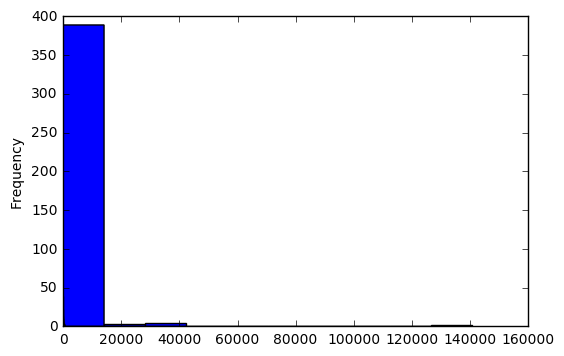

In [428]:
s_grouped_users = pd.Series(list(doc['count'] for doc in grouped_users))

s_grouped_users.plot(kind='hist')

data = s_grouped_users

plt.hist(data, bins=range(min(data), max(data) + 5, 10))

In [448]:
df_mode_dict.iloc[50:]

,contributions,count,bracket
62,62,1,61 to 70
63,63,2,61 to 70
64,64,2,61 to 70
68,68,2,61 to 70
69,69,1,61 to 70
70,70,1,61 to 70
71,71,1,71 to 80
77,77,1,71 to 80
78,78,1,71 to 80
79,79,3,71 to 80


In [91]:
from scipy import stats

stats.describe(bah)

DescribeResult(nobs=399, minmax=(1, 140794), mean=1707.1979949874687, variance=125050201.11899096, skewness=10.144399415922146, kurtosis=113.09548750905759)

### Plan going forward:

- Export list of duplicate addresses in two formats: full data in json/osm, addresses in 2 or 3 columns (3 with postcode)
- Wrangling file: add postcode cleaning